In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [3]:
from sklearn import datasets, linear_model, utils, preprocessing
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import dill

# Linear and Logistic Regression: What this is all about
<!-- requirement: images/linear_regression_error.gif -->
<!-- requirement: small_data/mnist.pkl -->
*&copy; The Data Incubator*

You might be familiar with term *linear regression*. It is a mathematical technique for identifying linear relationships in data.

We are going to explore Linear Regression using a well-known dataset called the *Boston Housing Data*. This is an old dataset included with scikit-learn that is frequently studied. It is data on housing values from the suburbs of Boston. Researchers can study the data to predict the median value of homes based on the other variables.

In [5]:
#with open("../../datacourse/predictive-analytics/small_data/mnist.pkl", "r") as fin:
with open("../small_data/mnist.pkl", "r") as fin:
    mnist = dill.load(fin)

mnist.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

These are the columns in the dataset:

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centers
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per \$10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in \$1000's

Let's add the data to a DataFrame to make it easier to use.

In [6]:
names = ['CRIM', 'ZN', 'INS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

data_dict = dict(CRIM='per capita crime rate by town',
                 ZN='proportion of residential land zoned for lots over 25,000 sq.ft.',
                 INS='proportion of non-retail business acres per town',
                 CHAS='Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
                 NOX='nitric oxides concentration (parts per 10 million)',
                 RM='average number of rooms per dwelling',
                 AGE='proportion of owner-occupied units built prior to 1940',
                 DIS='weighted distances to five Boston employment centres',
                 RAD='index of accessibility to radial highways',
                 TAX='full-value property-tax rate per \$10,000',
                 PTRATIO='pupil-teacher ratio by town',
                 B='1000(Bk - 0.63)^2 where Bk is the proportion of african americans by town',
                 LSTAT='% lower status of the population',
                 MEDV='Median value of owner-occupied homes in \$1000\'s')

boston_data = DataFrame(mnist.data, columns=names)

home_values = Series(mnist.target)

In [7]:
boston_data.head()

,CRIM,ZN,INS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
home_values.head()

0    24
1    21
2    34
3    33
4    36
dtype: int64

We can familiarize ourselves with the data by plotting it. Let's have some fun exploring data using IPython widgets.

Experiment with the dropdown to plot each column vs. Median home value.

**Question:** Which columns seem to have somewhat of a linear relationship with home values?

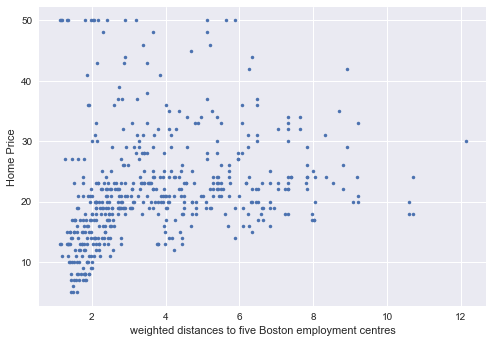

In [9]:
from ipywidgets import widgets

def boston_plot(column):
    plt.plot(boston_data[column], home_values, '.')
    plt.xlabel(data_dict[column])
    plt.ylabel('Home Price')

dropdown_values = {"{0}: {1}".format(k, v):k for k, v in data_dict.items()}

widgets.interact(boston_plot, column=dropdown_values);

The "average number of rooms per dwelling" (RM) in particular seems to have a linear relationship with home price. We can attempt to visualize that by adding a straight line to the chart.

**Question:** In the below figure, which line seems to best "fit" the data?

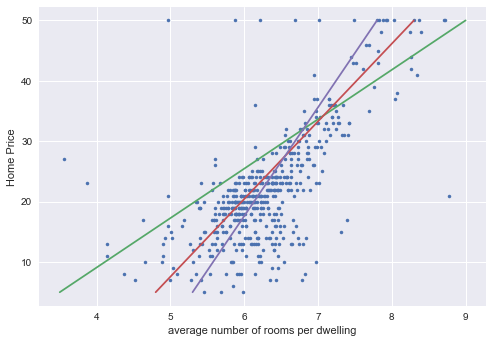

In [10]:
plt.plot(boston_data['RM'], home_values, '.')
plt.plot([3.5, 9], [5, 50], '-')
plt.plot([4.8, 8.3], [5, 50], '-')
plt.plot([5.3, 7.8], [5, 50], '-')

plt.xlabel(data_dict['RM'])
plt.ylabel('Home Price');

The green one looks like a poor fit to me but I can't decide if the red or purple one is the better.

But rather than eye-balling lines on charts, wouldn't it be great if there was a way to pick the "best" line that fits  the data?

Linear Regression is just that process. It is a mathematical process for measuring a line's "error" with respect to the data and picking the line that minimizes that error. It can describe the linear relationship between a set of numbers (the independent variables) and the dependent variable.

In this case the independent variable is the "average number of rooms per dwelling" and the dependent variable is the Home Price. The independent variables need not be limited to one variable. A complex model may have hundreds or more dependent variables!

Let's try Linear Regression to find the best fitting line. Is this result what you expected?

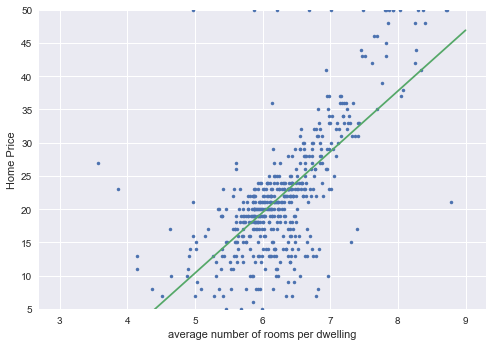

In [11]:
linreg = linear_model.LinearRegression(fit_intercept=True)  # fit_intercept=True is the default value
linreg.fit(boston_data[['RM']], home_values)
x = np.linspace(3, 9).reshape(-1,1)

plt.plot(boston_data['RM'], home_values, '.')
plt.plot(x, linreg.predict(x), '-')
plt.ylim(5, 50)
plt.xlabel(data_dict['RM'])
plt.ylabel('Home Price');

Let's dig deeper into how Linear Regression works.

## Linear Regression

This is the basic picture of linear regression errors:

![$L^1$ versus $L^2$ regularization](images/linear_regression_error.gif)

Linear Regression is perhaps the simplest linear model $f(X_{j \cdot}) = \sum_i \beta_i X_{ji}$.  The error model assumes the $y_j$'s are independent and normally distributed around $X_{ji} \cdot \beta_i$ with standard deviation $\sigma$.

### Likelihood and cost functions
Suppose that we knew that the correct model was given by some $\beta_i$.  Given the above assumption about the error model, the probability of measuring $y_j$ is simply

$$ P(y_j \mid \beta_i) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \,.$$

However, we don't know the $\beta_i$.  Instead we want to find them, given the $y_j$, by finding the $\beta_i$ that maximize $P(\beta_i \mid y_j)$.  Thanks to Bayes' Rule, we know

$$ P(\beta_i \mid y_j) = P(y_j \mid \beta_i) \frac{P(\beta_i)}{P(y_j)} \,.$$

We know the first term on the RHS, and $P(y_j)$ is independent of $\beta_i$, leaving only $P(\beta_i)$ unknown.  In linear regression, we suppose we have no *a priori* knowledge of the expected coefficients and take $P(\beta_i)$ to be constant as well.  Thus, the most probable model is determined by maximizing the likelihood function

$$ L(\beta) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \propto P(\beta_i \mid y_j) \,.$$

Since $\log$ is monotonic, we can also maximize the log-likelihood.  A few calculations show us that the negative log-likelihood (up to a linear transformation) is

$$- \log(L(\beta)) \sim \| y - X \beta \|^2\,.$$

Here, $\| z \| = \| z \|_2 = \sum_i |z_i|^2 $ is the $L^2$ norm.  The objective is to minimize this quadratic:

$$ \min_\beta \| y - X \beta \|^2\,.$$

Of course, this is the familiar expression for linear regression.  We could minimize $\beta$ via gradient descent, but it turns out that the solution has a closed form, 

$$ X \hat \beta = y\,, $$

or

$$ \hat \beta = (X^T X)^{-1} X^T y\,. $$

## Using Linear Regression

Let's see how this is used in practice. We will do a Linear Regression as before, but will shuffle the data first.

**Question:** Why is shuffling the data a good idea?

In [12]:
np.random.seed(42)
Xraw, y = utils.shuffle(mnist.data, mnist.target)
Xraw = pd.DataFrame(Xraw, columns=names)
y = pd.Series(y)

### Prepare the data with a train-test split

We use TRAIN data to fit our model, and we predict on TEST data.

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(Xraw, y, test_size=0.2)

Cross validation allows us to *train* the model on a subset of the data and later *test* the model on a different subset of data.

We shuffled the data to make sure that cross validation split is being done randomly. Sometimes the ordering of the dataset you start out with is not random. Watch out for this!

In [12]:
print Xraw.shape
print X_train.shape
print X_test.shape

(506, 13)
(404, 13)
(102, 13)


We also want to scale our data so that it has a mean of zero and a variance of one. Scaling the data is helpful when the input variables have different magnitudes and ranges. For example in the Boston dataset the relative scale of the CHAS and NOX columns is very different from that of the TAX column.

Scikit-learn has a transformer called `StandardScaler` that does exactly what we need.

Observe that we `fit` the `StandardScaler` with only the training data and then `transform` both the training and test data. This ensures that the `StandardScaler` is not scaling based on information from the test data.

In [13]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We can validate that the mean and variance is scaled as required.

In [14]:
train_means = X_train.mean(axis=0).to_frame('mean')

train_means['var'] = X_train.var(axis=0)
train_means['scaled_mean'] = X_train_scaled.mean(axis=0)
train_means['scaled_var'] = X_train_scaled.var(axis=0)

train_means

,mean,var,scaled_mean,scaled_var
CRIM,3.545257,67.940424,-2.858000e-17,1.0
ZN,12.155941,593.014084,-1.813731e-17,1.0
INS,11.041535,47.996129,1.076147e-15,1.0
CHAS,0.071782,0.066795,1.662586e-16,1.0
NOX,0.552421,0.013305,-1.868692e-15,1.0
RM,6.283183,0.450110,-8.133758e-15,1.0
AGE,68.626980,781.401975,-7.496753e-16,1.0
DIS,3.860926,4.603680,1.472969e-16,1.0
RAD,9.579208,76.194703,-1.676327e-17,1.0
TAX,410.138614,28593.960887,-1.127399e-16,1.0


The test data statistics look similar but observe the `scaled_mean` values are small but not equal to zero. This is expected because the `StandardScaler` was fit with only the training data.

In [15]:
test_means = X_test.mean(axis=0).to_frame('mean')
test_means['var'] = X_test.var(axis=0)
test_means['scaled_mean'] = X_test_scaled.mean(axis=0)
test_means['scaled_var'] = X_test_scaled.var(axis=0)

test_means

,mean,var,scaled_mean,scaled_var
CRIM,3.883911,98.751396,0.041137,1.442821
ZN,8.225490,341.042710,-0.161602,0.570875
INS,11.514020,43.632902,0.068285,0.902413
CHAS,0.058824,0.055911,-0.050203,0.830913
NOX,0.563704,0.013946,0.097941,1.040438
RM,6.290382,0.672329,0.010744,1.482725
AGE,68.368627,843.866927,-0.009254,1.072005
DIS,3.534092,3.714807,-0.152515,0.800993
RAD,9.431373,75.039798,-0.016957,0.977607
TAX,400.705882,27859.318579,-0.055852,0.967150


### Fit the model to the training data

Now that our data is ready, create a scikit-learn LinearRegression model and fit the model to the training data.

In [16]:
linreg = linear_model.LinearRegression()

linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Use the fitted model to make predictions with the test data

Feed in the test data to make out "out-of-sample" predictions.

In [17]:
linreg.predict(X_test_scaled)

array([ 34.78436041,  14.8454268 ,  32.47128582,  12.02821957,
        28.97045519,  34.73040303,  34.98995751,  24.09408901,
        13.04700058,  31.61935189,  14.78192174,  21.73020015,
        20.17423679,  24.0753403 ,  21.80826074,   7.55305913,
        24.7090585 ,  27.27418925,  20.80308155,  28.07195731,
        19.04765403,  20.41542722,  23.01685619,   1.05102108,
         3.59704428,  26.55434757,  12.15793671,  14.11952867,
        24.74773028,  13.21310585,  25.34288693,  21.03033461,
        15.7080702 ,  32.52274108,  24.38345746,  14.23656587,
        12.89842781,  28.37791477,  16.36083925,  22.49635966,
        27.09039692,  22.53189289,  22.68038358,  37.16925792,
        24.0828249 ,  24.63216913,  33.39164732,  28.04602707,
        13.55541287,  14.42033021,  31.71751083,   8.69845972,
        27.42343332,  27.44382387,  34.75430673,  34.70826091,
        24.91024973,  21.38070544,  15.46368491,  31.92786911,
         3.78636556,  36.20185073,  25.24856913,  20.52

### Model Parameters

What are the model parameters?

In [18]:
linreg.coef_

array([-0.90578626,  1.44459982, -0.0102243 ,  0.73843298, -2.29574112,
        2.04727294, -0.20087983, -3.43730022,  2.65269259, -2.00543748,
       -1.95300133,  0.53634745, -3.66140211])

In [19]:
linreg.intercept_

21.8316831683169

What do those numbers mean?

They are parameters in the following equation. This equation defines the model's linear relationship between the the data attributes and the cost of homes in Boston.

In [20]:
print ("prediction = " +
       "{0} +\n".format(linreg.intercept_) +
       " +\n".join(["{1} * {0}".format(n, f) for n, f in zip(names, linreg.coef_)]))

prediction = 21.8316831683 +
-0.9057862638 * CRIM +
1.44459981656 * ZN +
-0.0102242970951 * INS +
0.738432978975 * CHAS +
-2.29574111565 * NOX +
2.04727294035 * RM +
-0.200879825436 * AGE +
-3.43730021632 * DIS +
2.65269259169 * RAD +
-2.00543747712 * TAX +
-1.95300132952 * PTRATIO +
0.536347446995 * B +
-3.661402107 * LSTAT


When the model is making predictions, it throws the test data in that equation and calculates the predicted value.

### Model Error Measurements

This is the $R^2$ of the fitted model on the training data.

This number can be compared to other models on the same dataset.

In [21]:
linreg.score(X_train_scaled, y_train)

0.74109870921018106

And the $R^2$ of the fitted model on the test data.

In [22]:
linreg.score(X_test_scaled, y_test)

0.71169481987713534

# Regularization

Linear Regression results can be improved with Regularization techniques.

Regularization adds a "cost" to the optimization, penalizing larger coefficient values. This can help combat overfitting.

## Ridge Regression

Ridge regression adds a penalty to the Linear Regression optimization that is proportional to the sum of the squared parameter values, like this:

$$- \log(L(\beta)) \sim \| y - X \beta \|^2 + \alpha \| \beta \|^2\,.$$

This reduces the occurrence of extreme positive or negative values sometimes this improves out-of-sample model performance.

### Fit the model to the training data

Again, fit model with the training data.

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5.0)

ridge.fit(X_train_scaled, y_train)

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Use the fitted model to make predictions with the test data

In [24]:
ridge.predict(X_test_scaled)

array([ 34.62803114,  15.02911054,  32.38156763,  12.17886263,
        28.58400467,  34.39001892,  34.92805169,  24.18227192,
        13.22085714,  31.34279057,  14.96279287,  21.71712908,
        20.14578389,  23.77587353,  21.68996493,   7.88748596,
        24.54851158,  27.35220359,  20.84805708,  28.04137715,
        19.14767112,  20.49782306,  23.05645292,   1.02320722,
         3.81060653,  26.70213716,  12.20685953,  14.32379903,
        24.57557317,  13.20503589,  25.44008109,  20.61822305,
        15.69457516,  32.29886483,  24.45798973,  14.18936955,
        13.04478656,  28.25577714,  16.28212705,  22.40740082,
        27.06522841,  22.60047473,  22.51225323,  36.92969349,
        23.9256639 ,  24.55933305,  33.09072653,  28.43334639,
        13.47315918,  14.51453711,  31.60750106,   9.04479056,
        27.53587148,  27.38185153,  34.68077768,  34.56549675,
        24.89516876,  21.51113362,  15.38013261,  31.73371869,
         3.77114696,  36.06516125,  25.12250953,  20.65

### Model Parameters

What are the model parameters?

In [25]:
ridge.coef_

array([-0.85009453,  1.35258298, -0.12162462,  0.75185949, -2.11244321,
        2.10977992, -0.2271069 , -3.24635298,  2.2955956 , -1.69432171,
       -1.90439105,  0.55092608, -3.57874546])

Observe that the sum of the squared model parameters is smaller than before.

In [26]:
print sum(linreg.coef_ ** 2)
print sum(ridge.coef_ ** 2)

53.3361500569
47.5143285859


### Model Error Measurements

The $R^2$ of the fitted model on the training data:

In [27]:
ridge.score(X_train_scaled, y_train)

0.74065405307740972

And the out-of-sample test data. This is marginally better than the first linear regression model.

In [28]:
ridge.score(X_test_scaled, y_test)

0.71185689556516274

## RidgeCV

`RidgeCV()` is just like `Ridge()` but with cross-validation built in.

### Fit the model to the training data

In [29]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.5, 5.0, 7.5, 10.0))

ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=(0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 3.5, 5.0, 7.5, 10.0), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

### Use the fitted model to make predictions with the test data

In [30]:
ridgecv.predict(X_test_scaled)

array([ 34.67357198,  14.97679278,  32.41098959,  12.13547037,
        28.69022916,  34.48497775,  34.94667891,  24.15703904,
        13.16856898,  31.42338472,  14.91117437,  21.71870734,
        20.15156194,  23.86092501,  21.72283814,   7.79148571,
        24.59401249,  27.33159319,  20.83821681,  28.05291211,
        19.12200979,  20.47309447,  23.04861718,   1.02811196,
         3.74914543,  26.66060209,  12.19186794,  14.26562549,
        24.62306485,  13.20608431,  25.41658144,  20.72685711,
        15.69810695,  32.36266747,  24.43655436,  14.20166161,
        13.0038929 ,  28.2917225 ,  16.30348964,  22.43106346,
        27.07043968,  22.58204316,  22.56015866,  36.99664009,
        23.96801723,  24.57890067,  33.17519165,  28.32400717,
        13.49507905,  14.48854154,  31.63952964,   8.94568551,
        27.50443521,  27.40026087,  34.70382434,  34.60794135,
        24.89799774,  21.47538888,  15.40278566,  31.78906304,
         3.77324595,  36.10521958,  25.15550028,  20.62

### Model Parameters

What are the model parameters?

In [31]:
ridgecv.coef_

array([-0.8653624 ,  1.37814493, -0.09236211,  0.74843312, -2.16402598,
        2.09266382, -0.21982726, -3.30126566,  2.39172683, -1.77650398,
       -1.9180447 ,  0.54688184, -3.60266399])

And the `alpha` value?

In [32]:
ridgecv.alpha_

3.5

### Model Error Measurements

The $R^2$ of the fitted model on the training data:

In [33]:
ridgecv.score(X_train_scaled, y_train)

0.7408662014121532

And the out-of-sample test data. This is marginally better than the first linear regression model.

In [34]:
ridgecv.score(X_test_scaled, y_test)

0.71187676185499615

## Lasso Regularization

Lasso is like ridge regression but has the ability to automatically select features.  The objective function to minimize is

$$ \frac{1}{2 n} \| y - X^T \beta \|^2 + \alpha \|\beta\|_1 $$

where $\|\beta\|_1 = \sum_i |\beta_i| $ is the $L^1$ norm (sum of the absolute values) of $\beta$ and $n$ is the number of samples. Lasso has a feature selection property where many weights on features are zero (i.e. those features are not selected).

### Fit the model to the training data

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Use the fitted model to make predictions with the test data

In [36]:
lasso.predict(X_test_scaled)

array([ 33.57971332,  15.99473962,  31.67058792,  12.6744583 ,
        26.95070312,  32.30336468,  34.77558235,  24.55288296,
        13.95577824,  30.00558792,  16.06392183,  21.28672616,
        19.59730668,  22.69235234,  22.10880808,   8.75856889,
        25.23026111,  27.65589462,  21.12663385,  27.95123026,
        19.49310274,  20.38192966,  23.50824303,  -0.49030542,
         4.29338178,  27.61086468,  11.66927805,  15.45577602,
        23.40602214,  13.66579629,  26.10918667,  19.38300679,
        16.34086157,  31.36684269,  25.12827044,  13.75252541,
        14.08838179,  27.70655573,  15.85679992,  21.67518708,
        27.00332595,  23.17831864,  21.24633568,  35.86443594,
        22.59476081,  24.13660315,  31.65796846,  30.48960952,
        12.52356453,  15.61232027,  30.94229758,  10.10980582,
        28.35683918,  27.78701013,  35.79798027,  35.4087116 ,
        24.79009819,  21.26422519,  14.45573135,  30.52415185,
         3.04816334,  35.50800156,  24.89894211,  20.99

### Model Parameters

Observe that some of the parameters are zero:

In [37]:
lasso.coef_

array([-0.26813812,  0.75789759, -0.16463754,  0.66288314, -1.38428088,
        2.36987668, -0.        , -1.98987172,  0.0682704 , -0.        ,
       -1.6854155 ,  0.41280165, -3.68693855])

That means some of the attributes are essentially excluded from the model.

In [38]:
print ("prediction = " +
       "{0} +\n".format(lasso.intercept_) +
       " +\n".join(["{1} * {0}".format(n, f) for n, f in zip(names, lasso.coef_)]))

prediction = 21.8316831683 +
-0.268138118185 * CRIM +
0.757897586636 * ZN +
-0.16463754235 * INS +
0.662883137722 * CHAS +
-1.384280876 * NOX +
2.36987668233 * RM +
-0.0 * AGE +
-1.98987172173 * DIS +
0.0682703953392 * RAD +
-0.0 * TAX +
-1.68541550085 * PTRATIO +
0.412801647903 * B +
-3.68693854557 * LSTAT


### Model Error Measurements

The $R^2$ of the fitted model on the training data:

In [39]:
lasso.score(X_train_scaled, y_train)

0.71962150177233086

And the test data:

In [40]:
lasso.score(X_test_scaled, y_test)

0.70706870355266616

# Logistic Regression

In Logistic Regression, the values of $y$ are categorical ($0$ or $1$) and assumed to be distributed binomially.  We assume that the probability $p(X_{j\cdot})$ that $y = 1$ is related to $X$ via the logit function:

$$ \mbox{logit }(p(X_{j\cdot})) = \log \frac{p(X_{j\cdot})}{1-p(X_{j\cdot})} = X_{ji} \cdot \beta_i\,. $$

Notice that the logit function $\log \frac{x}{1-x}$ is just the log odds and maps the real numbers $[0,1]$ to $\mathbb{R}$.

Below is a plot of the logit function.

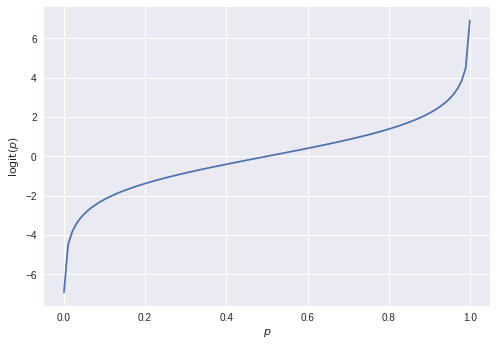

In [41]:
lx = np.linspace(0.001,0.999,100)
ly = np.log(lx/(1-lx))
plt.plot(lx,ly)
plt.xlabel('$p$')
plt.ylabel(r'$\mathrm{logit}(p)$');

It may be more clear to invert this to get an expression for $p(X_{j\cdot})$:

$$ p(X_{j\cdot}) = \frac{\exp\left( X_{ji} \cdot \beta_i\right)}{1 + \exp\left( X_{ji} \cdot \beta_i\right)} $$

The input can vary over the entire real numbers, but the output is always a valid probability between 0 and 1.

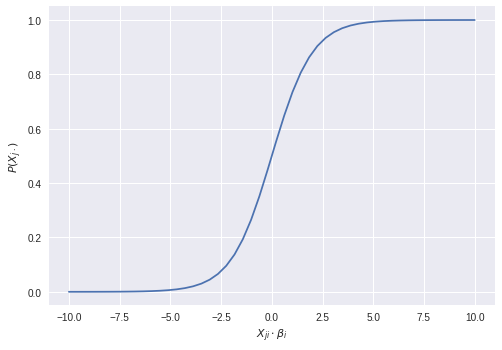

In [42]:
lx = np.linspace(-10, 10)
ly = np.exp(lx) / (1 + np.exp(lx))
plt.plot(lx, ly)
plt.xlabel(r'$X_{ji} \cdot \beta_i$')
plt.ylabel(r'$P(X_{j\cdot})$');

In the following example, we'll try to predict whether the home price is greater than or less than $25K.

In [51]:
y_cat_train = y_train > 25.
y_cat_test = y_test > 25.


### Fit the model to the training data

In [52]:
logistic = linear_model.LogisticRegression()


logistic.fit(X_train_scaled, y_cat_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Use the fitted model to make predictions with the test data

Observe the predictions are now True/False values

In [45]:
logistic.predict(X_test_scaled)

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False], dtype=bool)

### Model Parameters

In [46]:
logistic.coef_

array([[ 0.01030827,  0.36643115, -0.68973531,  0.16049919, -0.45529223,
         1.11225649,  0.14420648, -0.9609631 ,  1.32510928, -0.75307547,
        -0.52953126, -0.03212721, -1.67334051]])

### Model Error Measurements

$R^2$ doesn't make sense for logistic regression, so this uses % accuracy instead.

In [47]:
logistic.score(X_train_scaled, y_cat_train)

0.9133663366336634

In [48]:
logistic.score(X_test_scaled, y_cat_test)

0.94117647058823528

## Multiclass classification problems

So far we have talked about Two-Class classification in the context of Logistic Regression.  But what if we have more than two classes?  There are generally two strategies to "bootstrap" a binary classifier to a multi-class classifier: 
1. **One-versus-All**: For each class $k=1,\ldots,K$, build a binary classifier for all points with label $y = k$ versus $y \neq k$.
1. **All-versus-All**: For each class $k \neq k'$, construct a binary classifier to distinguish between class $k$ and $k'$.

[Scikit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) uses One-versus-All for Multi-class Logistic Regression.

If $f_k(x)$ is the predictor for class $k$, the probability of class $k$ is just the normalized predictions,

$$ p_k = \frac{f_k(x)}{\sum_k f_k(x)}$$

Or in other words, each prediction divided by the sum of the predictions.

### Questions
1. How would you assess whether a relationship is actually linear?
1. Imagine that when you loaded your data, you unwittingly loaded each row of the data (both $X$ and $y$) twice and performed the same regression.  What is the effect on your estimates $\beta$?
1. Imagine when you loaded your data, you unwittingly loaded each column of the features (just $X$) twice and performed the same regression.  What is the effect on your estimates $\beta$?
1. Everything we've talked about so far involves loading all the data into memory.  What if you have more data than you can fit into memory?

### Exit Tickets
1. Enumerate the similarities and differences between linear regression and logistic regression.
1. What is the purpose of splitting a dataset into testing and training datasets?
1. Why is it important to randomize a dataset before splitting it into test and training datasets?
1. What are the benefits of regularization?

### Question Answers

1. To assess if the relationship is linear, plot the distribution of the residuals as a function of $x$.  If there's a systematic bias, take a look at it and see what's going on.
1. Loading rows twice has no effect on $\beta$ but it does artificially increase your confidence (dividing it by a factor $\sqrt{2}$)
1. The problem becomes degenerate and $\beta_j$ is now split between $\beta_{j'}$ and $\beta_{j''}$ such that $\beta_j = \beta_{j'} + \beta_{j''}$.
1. All of these problems can be solved using gradient descent, which only requires a *stream* of data, rather than the entire dataset.  Linear regression (with either $L^2$, Huber penalty, epsilon insensitive) can be solved using `sklearn.linear_model.SGDRegressor` and logistic regression can be solved using `sklearn.linear_model.SGDClassifier`.  These methods implement a `partial_fit` method, which can iteratively updates the coefficients on small chunks of data.  In this case, you are no longer ram constrained, but constrained in the amount of time it takes to read data from disk.

*Copyright &copy; 2017 The Data Incubator.  All rights reserved.*